In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part 1

## a) txt file

* 5 First lines of the book: <br >
Facts and fancies for the curious from the harvest-fields of literature

In [2]:
filename = 'pg66541.txt'
with open(filename , mode='r') as file:
    lines = file.readlines()
    for line in lines[:5]:
        print(line)

The Project Gutenberg eBook of Facts and fancies for the curious from the

harvest-fields of literature, by Charles C. Bombaugh



This eBook is for the use of anyone anywhere in the United States and

most other parts of the world at no cost and with almost no restrictions



* Words

In [3]:
with open(filename , mode='r') as file:
    lines = file.readlines()
    words = [] 
    for line in lines:
        words.extend(line.split())

print('50 first words of the book', words[:50])        

50 first words of the book ['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'of', 'Facts', 'and', 'fancies', 'for', 'the', 'curious', 'from', 'the', 'harvest-fields', 'of', 'literature,', 'by', 'Charles', 'C.', 'Bombaugh', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.', 'You']


## b) csv file

In [4]:
filename = 'country_vaccinations.csv'
data = pd.read_csv(filename)
data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45979,Zimbabwe,ZWE,2021-09-16,4964302.0,2930550.0,2033752.0,108486.0,51755.0,32.89,19.42,13.48,3429.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
45980,Zimbabwe,ZWE,2021-09-17,NaN,NaN,NaN,NaN,45993.0,NaN,NaN,NaN,3047.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
45981,Zimbabwe,ZWE,2021-09-18,4992501.0,2940750.0,2051751.0,NaN,40514.0,33.08,19.49,13.59,2684.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
45982,Zimbabwe,ZWE,2021-09-19,5015041.0,2948725.0,2066316.0,22540.0,40630.0,33.23,19.54,13.69,2692.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


### Removing row Duplicates

* If there are any duplicated rows with same country and same date time we will remove it. <br>
As we will see the shape of data won't change so there are no duplicated data. <br><br>
* "iso_code" removed because it has no information rather than country name. 

### Duplicated rows = 0
### Duplicated columns = 1(iso_code)

In [5]:
data_droped_duplicates = data.drop_duplicates(['country', 'date'])
print(f'data shape: {data.shape} - data shape after removing duplicate: {data_droped_duplicates.shape}')
data = data_droped_duplicates
data = data.drop(columns=['iso_code'])

data shape: (45984, 15) - data shape after removing duplicate: (45984, 15)


### Missing Values

In [6]:
data.isna().sum()/data.shape[0]

country                                0.000000
date                                   0.000000
total_vaccinations                     0.454506
people_vaccinated                      0.479254
people_fully_vaccinated                0.542276
daily_vaccinations_raw                 0.552018
daily_vaccinations                     0.006676
total_vaccinations_per_hundred         0.454506
people_vaccinated_per_hundred          0.479254
people_fully_vaccinated_per_hundred    0.542276
daily_vaccinations_per_million         0.006676
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

* Columns that have information of number of vaccinations just have missing values

* daily_vaccinations column has the least misssing values. Those missing values are for first row of each
  country. So we fill it with backward method to put the next day daily_vaccinations into it.
  Also we fill daily_vaccinations_per_million with same method.
 

In [7]:
data['daily_vaccinations'] = data['daily_vaccinations'].fillna(method='bfill')
data['daily_vaccinations_per_million'] = data['daily_vaccinations_per_million'].fillna(method='bfill')


* We delete all columns that has more than 20 percent missing values. <br><br>
* We don't delete any rows because for each row we have at list daily vaccinations filled <br >
some value and it has information for our data analysis about vaccinations.

### Deleted rows = 0
### Deleted columns =  7

In [8]:
del data['total_vaccinations']                    
del data['people_vaccinated']                     
del data['people_fully_vaccinated']               
del data['daily_vaccinations_raw']                
del data['total_vaccinations_per_hundred']        
del data['people_vaccinated_per_hundred']         
del data['people_fully_vaccinated_per_hundred']   

### Finally we see there is no missing value in data

In [9]:
data.isna().sum()/data.shape[0]

country                           0.0
date                              0.0
daily_vaccinations                0.0
daily_vaccinations_per_million    0.0
vaccines                          0.0
source_name                       0.0
source_website                    0.0
dtype: float64

## c) log file

In [11]:
git_log = pd.read_csv( 'git.log', sep='#', header=None, names=['id', 'author'] )
unique_authors = git_log['author'].unique()
unique_authors


array(['Linus Torvalds', 'Adrian Hunter', 'Kees Cook', ..., 'Niu YaWei',
       'Jason Davis', 'Giovambattista Pulcini'], dtype=object)

# Part 2

## a) txt file

In [12]:
print(f'number of all words: {len(words)}')
print(f'number of all distinct words: {len(set(words))}')

number of all words: 160105
number of all distinct words: 32876


## b) csv file

### Staistics

In [13]:
data.describe()

,daily_vaccinations,daily_vaccinations_per_million
count,4.598400e+04,45984.000000
mean,1.300630e+05,3541.054715
std,8.729856e+05,4473.399298
min,0.000000e+00,0.000000
25%,8.517500e+02,501.000000
50%,6.639000e+03,2175.000000
75%,4.125650e+04,5289.000000
max,2.242429e+07,117497.000000


### first vaccination column

In [14]:
data['first_vac'] = data['vaccines'].apply(lambda vaccines: str.split(vaccines, ',')[0])

### Maxmimum and minimum vaccinations from daily_vaccinations column

In [15]:
total_vaccinations_for_each_country = data.groupby(['country'])['daily_vaccinations'].sum().sort_values()
print('#'*15, '5 least vaccinated countries', '#'*15)
print(total_vaccinations_for_each_country.head(5))
print('#'*15, '5 most vaccinated countries', '#'*15)
print(total_vaccinations_for_each_country.tail(5))

############### 5 least vaccinated countries ###############
country
Pitcairn          43.0
Turkmenistan     312.0
Tokelau         1068.0
Niue            2571.0
Montserrat      3002.0
Name: daily_vaccinations, dtype: float64
############### 5 most vaccinated countries ###############
country
Japan            1.505581e+08
Brazil           2.192984e+08
United States    3.838358e+08
India            7.829250e+08
China            2.168783e+09
Name: daily_vaccinations, dtype: float64


### countries with most days without vaccinations

In [16]:
data.groupby('country')['daily_vaccinations'].apply(lambda x: x[x == 0].count()).sort_values(ascending=False).head(5)

country
Pitcairn         42
Tuvalu           36
Liechtenstein    29
Montserrat       29
Denmark          20
Name: daily_vaccinations, dtype: int64

## Countries have more than 20 m vaccinations in a day. Just china with 12 days. <br>
Computed from daily_vaccinations column

In [17]:
number_of_days_each_country_has_more_than_20_m = data.groupby('country')['daily_vaccinations'].apply(lambda x: x[x > 20000000].count()).sort_values(ascending=False)
number_of_days_each_country_has_more_than_20_m [number_of_days_each_country_has_more_than_20_m > 0]

country
China    13
Name: daily_vaccinations, dtype: int64

### I think question is wrong. Because as we see below the column vaccine is the same for each <br>
### country for all of its rows. so question has no meaning.

In [18]:
data.groupby('country')['vaccines'].nunique().sort_values()

country
Afghanistan    1
Nicaragua      1
Niger          1
Nigeria        1
Niue           1
              ..
Greenland      1
Grenada        1
Guatemala      1
France         1
Zimbabwe       1
Name: vaccines, Length: 222, dtype: int64

## c) log file

* contribution counts and rates for each author

In [19]:
print(git_log['author'].value_counts())
print(git_log['author'].value_counts()/len(git_log))

Linus Torvalds     23361
David S. Miller     9106
Mark Brown          6802
Takashi Iwai        6209
Al Viro             6006
                   ...  
Steve Soule            1
gouji-new              1
Pau Pajuel             1
Gr�goire Baron         1
Eric Yuen              1
Name: author, Length: 17382, dtype: int64
Linus Torvalds     0.033417
David S. Miller    0.013026
Mark Brown         0.009730
Takashi Iwai       0.008882
Al Viro            0.008591
                     ...   
Steve Soule        0.000001
gouji-new          0.000001
Pau Pajuel         0.000001
Gr�goire Baron     0.000001
Eric Yuen          0.000001
Name: author, Length: 17382, dtype: float64


* 5 authors with most contribution

In [20]:
git_log['author'].value_counts().sort_values(ascending=False)[:5]

Linus Torvalds     23361
David S. Miller     9106
Mark Brown          6802
Takashi Iwai        6209
Al Viro             6006
Name: author, dtype: int64

### plot
Because authors contributions has a exponential distribution we plot the histogram in three chunck. <br>
We first sort authors by their contributions. Then we first plot the first 50 authors. <br>
Then 50 to 500 and finally 500 to end.

Here we can see the each part of total exponential distribution in three chunk better.

* One author has a lot more conribution than others named Linus Torvalds, the Inventor!

* Most of the authors have contributions near 1 commits.

* (0 to 50) Their contributions range from 1800 to 23361 
* (500 to end) Their contributions range from 250 to 1800 

Text(0.5, 1.0, '50 to end authors with most contributions')

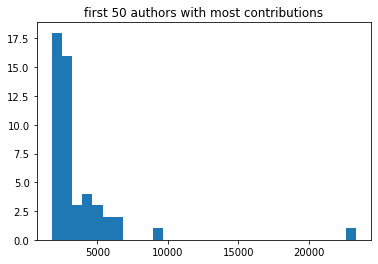

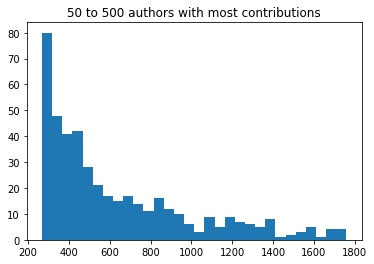

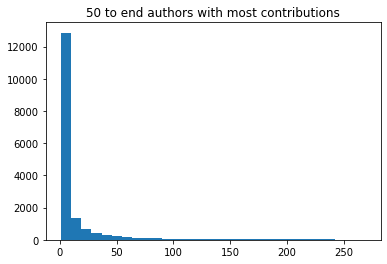

In [21]:
plt.hist(git_log['author'].value_counts().sort_values(ascending=False)[:50].reset_index(drop=True), bins=30)
plt.title('first 50 authors with most contributions')
plt.figure()
plt.hist(git_log['author'].value_counts().sort_values(ascending=False)[50:500].reset_index(drop=True), bins=30)
plt.title('50 to 500 authors with most contributions')
plt.figure()
plt.hist(git_log['author'].value_counts().sort_values(ascending=False)[500:].reset_index(drop=True), bins=30)
plt.title('50 to end authors with most contributions')


# Part 3

## csv file

* data downloaded from https://data.humdata.org/dataset/coronavirus-covid-19-cases-and-deaths?

In [22]:
filename = 'WHO-COVID-19-global-data.csv'
df = pd.read_csv(filename)
cases_deaths = df
vaccines = data
cases_deaths = cases_deaths.rename(columns={'Date_reported': 'date'})

### Join two tables

In [23]:
merged = vaccines.merge(cases_deaths, on='date', how='inner')
merged

,country,date,daily_vaccinations,daily_vaccinations_per_million,vaccines,source_name,source_website,first_vac,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,Afghanistan,2021-02-22,1367.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...,Johnson&Johnson,AF,Afghanistan,EMRO,13,55617,1,2433
1,Afghanistan,2021-02-22,1367.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...,Johnson&Johnson,AL,Albania,EURO,1184,100246,13,1666
2,Afghanistan,2021-02-22,1367.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...,Johnson&Johnson,DZ,Algeria,AFRO,153,111917,3,2961
3,Afghanistan,2021-02-22,1367.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...,Johnson&Johnson,AS,American Samoa,WPRO,0,0,0,0
4,Afghanistan,2021-02-22,1367.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...,Johnson&Johnson,AD,Andorra,EURO,27,10699,0,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10898203,Wales,2020-12-13,2257.0,712.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,Moderna,VN,Viet Nam,WPRO,4,1395,0,35
10898204,Wales,2020-12-13,2257.0,712.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,Moderna,WF,Wallis and Futuna,WPRO,0,3,0,0
10898205,Wales,2020-12-13,2257.0,712.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,Moderna,YE,Yemen,EMRO,1,2087,0,607
10898206,Wales,2020-12-13,2257.0,712.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,Moderna,ZM,Zambia,AFRO,0,18091,0,364


### commulative vaccinations vs cases plot for Iran 

As we see when vaccines increases rate of increasing cases decreasees.

Text(0.5, 1.0, 'cases vs vaccines')

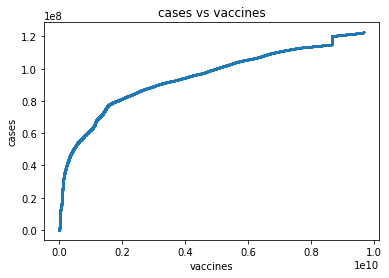

In [24]:
iran = merged[merged['country'] == 'Iran']

plt.scatter(iran['daily_vaccinations'].cumsum(), iran['New_cases'].cumsum(), s=0.5)
plt.ylabel('cases')
plt.xlabel('vaccines')
plt.title('cases vs vaccines')